In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

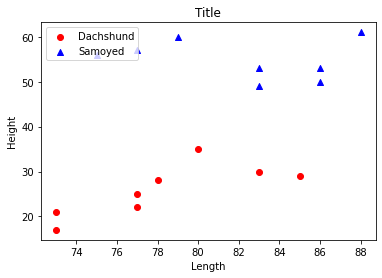

In [2]:
# 데이터 입력 (닥스훈트/사모에드)
# 닥스훈트의 길이와 높이 데이터 입력
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 29, 30, 21, 22, 17, 35]
# 사모에드의 길이와 높이 데이터 입력
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

# 닥스훈트 데이터를 붉은색으로 그래프에 표시
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
# 사모에드의 데이터를 푸른색으로 그래프에 표시/마커를 따로 명시해 도형모양 변경
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')

# 그래프의 x축 레이블 'Length'
plt.xlabel('Length')
# 그래프의 y축 레이블 'Height'
plt.ylabel('Height')
# 그래프의 제목 레이블 'Title'
plt.title('Title')
# 그래프의 설명 위치 '좌측상단'
plt.legend(loc='upper left')

# 그래프 보여주기
plt.show()

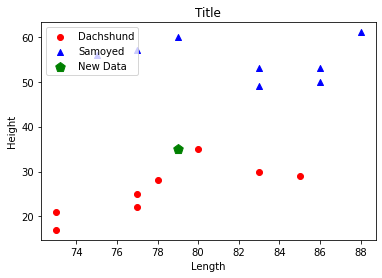

In [3]:
# 새로운 임이의 데이터 추가
newdata_length = [79]
newdata_height = [35]

# 닥스훈트 데이터를 붉은색으로 그래프에 표시
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
# 사모에드의 데이터를 푸른색으로 그래프에 표시/마커를 따로 명시해 도형모양 변경
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')
# 새로운데이터 추가해서 그래프에 그리기
plt.scatter(newdata_length, newdata_height, s=100, c ='green', marker='p', label='New Data')

# 그래프의 x축 레이블 'Length'
plt.xlabel('Length')
# 그래프의 y축 레이블 'Height'
plt.ylabel('Height')
# 그래프의 제목 레이블 'Title'
plt.title('Title')
# 그래프의 설명 위치 '좌측상단'
plt.legend(loc='upper left')

# 그래프 보여주기
plt.show()

In [4]:
# 모델 훈련을 위해 닥스훈트의 몸길이&높이 데이터를 묶어 d_data 배열 생성
d_data = np.column_stack((dach_length, dach_height))

# d_dat 배열의 크기와 같은 0으로 이루어진 배열[0,0,...] 생성
d_label = np.zeros(len(d_data))

In [5]:
# 동일한 명령으로 사모예드 데이터 s_data배열 생성
s_data = np.column_stack((samo_length, samo_height))

# label도 동일하게 하지만 이번에는 1로 이루어진 배열 생성
s_label = np.ones(len(s_data))

# 이전에 추가한 새로운 데이터도 비슷한 형식으로 배열 생성
newdata = [[79, 35]]

In [6]:
# 새로 생성한 배열과 레이블 각각합치기
dogs = np.concatenate((d_data, s_data))
labels = np.concatenate((d_label, s_label))

In [7]:
# 키값이 0일 때 Dachshund, 1일 때 Samoyed형식으로 딕셔너리 생성
dog_classes = {0:'Dachshund', 1:'Samoyed'}
# 나중에 결과를 출력할때 사용자가 보기 쉽게 레이블하기 위해 사용

# KNN 분류기에서 사용할 k값 지정
k = 3

# KNN 분류기 생성(선언)
knn = KNeighborsClassifier(n_neighbors = k)
# 이전에 생성한 KNN 분류기에 개 몸데이터와 각 데이터의 레이블 입력해 학습
knn.fit(dogs, labels)
# 학습된 knn모델에 새로운 데이터의 예측값 분석하게 하여 y_pred에 저장
y_pred = knn.predict(newdata)
# y_pred에 저장된 데이터 출력
print('데이터: {}에 대한 판정결과는: {}입니다.'.format(newdata, dog_classes[y_pred[0]]))

# 다른 데이터도 학습
otherdata = [[77, 30], [75, 56]]
y_pred_n = knn.predict(otherdata)
print('데이터: {}에 대한 판정결과는: {}입니다.'.format(otherdata, dog_classes[y_pred_n[0]]+'와 '+dog_classes[y_pred_n[1]]))

데이터: [[79, 35]]에 대한 판정결과는: Dachshund입니다.
데이터: [[77, 30], [75, 56]]에 대한 판정결과는: Dachshund와 Samoyed입니다.


In [8]:
# sklearn패키지의 데이터 셋인 load_iris를 iris변수에 저장
iris = load_iris()
# 제대로 저장되었는지 확인을 위해 앞의 5개 데이터만 출력
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
# iris.data 와 iris.feature_names로 데이터 프레임 생성
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# 생성한 데이터프레임에 추가로 iris데이터의 'target'이라는 데이터도 가져와 해당 데이터프레임의 열로 추가
iris_df['target'] = pd.Series(iris.target)
# 생성한 데이터프레임 5개의 행만 요약
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# 생성한 데이터프레임 요약
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
# x는 레이블 데이터를 제외한 데이터 y는 레이블 데이터로 구분
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

In [12]:
# KNN 모델 성능 점수 알려주는 함수 생성
def iris_knn(X, y, k):
    # train_test_split함수를 활용하여 데이터를 훈련데이터와 검증데이터로 구분
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # knn 모델 선언 (입력받은 k로 k값 지정)
    knn = KNeighborsClassifier(n_neighbors = k)
    # 훈련데이터를 학습 (입력값은 데이터,레이블 형식으로 입력)
    knn.fit(X_train, y_train)
    # 훈련데이터로 학습시킨 knn모델을 활용하여 검증데이터 검증
    y_pred = knn.predict(X_test)
    # 검증데이터들을 예측한 레이블값인 y_pred와 실제 레이블인 y_test간의 오차(정확도) 추정값 리턴
    return metrics.accuracy_score(y_test, y_pred)

# 훈련 범위를 3으로 지정
k = 3
# 모델 정확도 리턴하는 함수 실행
scores = iris_knn(X, y, k)
# 모델 정확도 점수 출력
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.956


In [13]:
# 번외 - 훈련데이터와 검증데이터를 나누어 학습시키지 않고 모델 학습
# 데이터 불러와 저장
iris = load_iris()
# 훈련 범위 3으로 지정
k = 3
# knn모델 선언
knn = KNeighborsClassifier(n_neighbors = k)
# iris데이터로 모델 학습
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# 이전에 학습한 k-NN 분류기 모델을 활용하여 새로운 데이터를 가지고 예측시행

# 출력용 레이블 생성
classes = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

#새로운 데이터 저장
x = [[4, 2, 1.3, 0.4], [4, 3, 3.2, 2.2]]

# 분류기 모델 실행
y = knn.predict(x)

# 분류 결과들 출력
for a in range(len(x)):
    print('{} 특성을 가지는 품종: {}'.format(x[a], classes[y[a]]))

[4, 2, 1.3, 0.4] 특성을 가지는 품종: Setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종: Versicolor


In [15]:
# 전체 데이터와 비교해서 정확도 출력
# 전체 데이터에 대한 분류 모델을 활용한 예측
y_pred_all = knn.predict(iris.data)
# 예측한 데이터와 실제 데이터간 정확도 비교
scores = metrics.accuracy_score(iris.target, y_pred_all)

# 정활도 출력
print('n_neighbors가 {0:d}일때 정확도 {1:.3f}'.format(k, scores))
# 분명 학습에 들어간 데이터를 가지고 다시 예측을 돌렸음에도 예측에 실패한 데이터도 존재하다는 것을 확인

n_neighbors가 3일때 정확도 0.960


(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7f30ad31d730>)

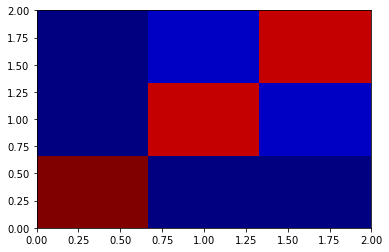

In [16]:
# 결과에 대해 정답과 예측을 쌍으로 2차원 히스토그램 생성
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)

(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7f30ad300040>)

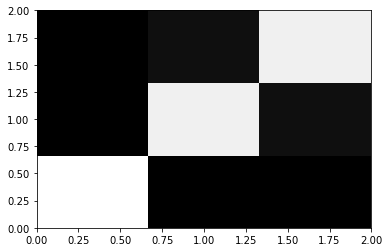

In [17]:
# 결과에 대해 정답과 예측을 쌍으로 2차원 히스토그램 생성
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.gray)

In [18]:
# 위의 시각화 결과를 혼동 행렬(confusion matrix)이라는 이름으로 구현가능
conf_mat = confusion_matrix(iris.target, y_pred_all)
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

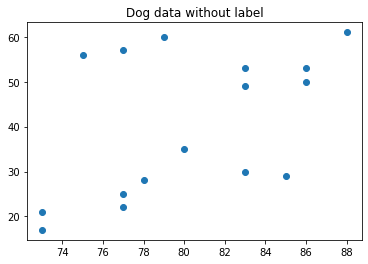

In [19]:
# 군집화 k-평균 모델
# 개의 길이와 높이를 각각 ndarray 형태로 만들기
dog_length = np.array(dach_length + samo_length)
dog_height = np.array(dach_height + samo_height)

# 길이와 높이를 하나의 데이터로 형성
dog_data = np.column_stack((dog_length, dog_height))

# 생성한 데이터 분포 확인
plt.title("Dog data without label")
plt.scatter(dog_length, dog_height)

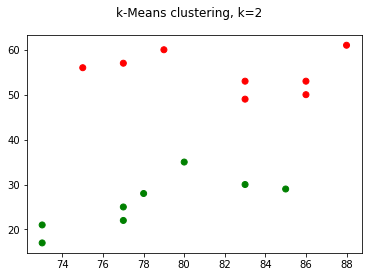

In [20]:
# k-평균 모델 함수 선언
def kmeans_predict_plot(X,k):
    # k-평균 모델 선언 (이때 군집 크기는 k만큼)
    model = cluster.KMeans(n_clusters = k)
    # 입력받은 x로 모델 학습
    model.fit(X)
    # 모델이 분류한 라벨들 저장
    labels = model.predict(X)
    # 분류한 라벨에 지정하기 위한 색 배열 저장
    colors = np.array(['red', 'green', 'blue', 'magenta'])
    # 모델이 분류한 데이터 표시
    plt.suptitle('k-Means clustering, k={}'.format(k))
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels])
    
# 집단이 2개일때
kmeans_predict_plot(dog_data, k=2)

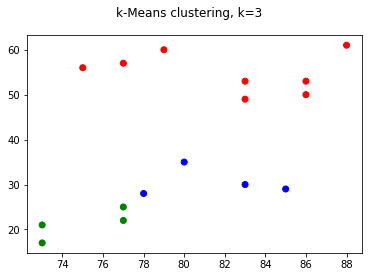

In [21]:
# 집단이 3개일때
kmeans_predict_plot(dog_data, k=3)

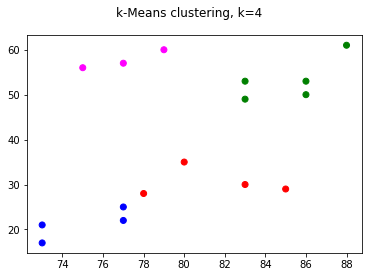

In [22]:
# 집단이 4개일때
kmeans_predict_plot(dog_data, k=4)

In [23]:
# iris데이터
iris = load_iris()
# iris.data 와 iris.feature_names로 데이터 프레임 생성
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# 생성한 데이터프레임에 추가로 iris데이터의 'target'이라는 데이터도 가져와 해당 데이터프레임의 열로 추가
iris_df['target'] = pd.Series(iris.target)

# iris 데이터
X = iris_df.iloc[:, :4]
# iris 레이블
y = iris_df.iloc[:, -1]

# k-평균 모델 함수
def kmeans_predict(X,k):
    # k-평균 모델 선언 (이때 군집 크기는 k만큼)
    model = cluster.KMeans(n_clusters = k)
    # 입력받은 x로 모델 학습
    model.fit(X)
    # 모델이 분류한 라벨들 저장
    labels = model.predict(X)
    return labels

# k-평균 모델 결과값 저장
labels = kmeans_predict(X,3)

In [24]:
# 다시 제대로 레이블링 (setosa(0), versicolor(1), virginica(2))
n_label = []
for a in labels:
    if a == 0:
        n_label.append(1)
    elif a == 1:
        n_label.append(0)
    else:
        n_label.append(2)

# 정확도 추출 함수
scores = metrics.accuracy_score(iris.target, n_label)

In [25]:
# 결과들 출력
print("kMenas() 군집화 적용")
print("군집화 결과 labels = {}".format(labels))
print("다시 레이블링을 한 후의 new_labels = {}".format(n_label))
print("iris 데이터의 군집화 정확도: {}".format(scores))

kMenas() 군집화 적용
군집화 결과 labels = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
다시 레이블링을 한 후의 new_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2]
iris 데이터의 군집화 정확도: 0.44
